<a href="https://colab.research.google.com/github/Risgan/LineasCodigo/blob/Python/fundamentosCodigos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

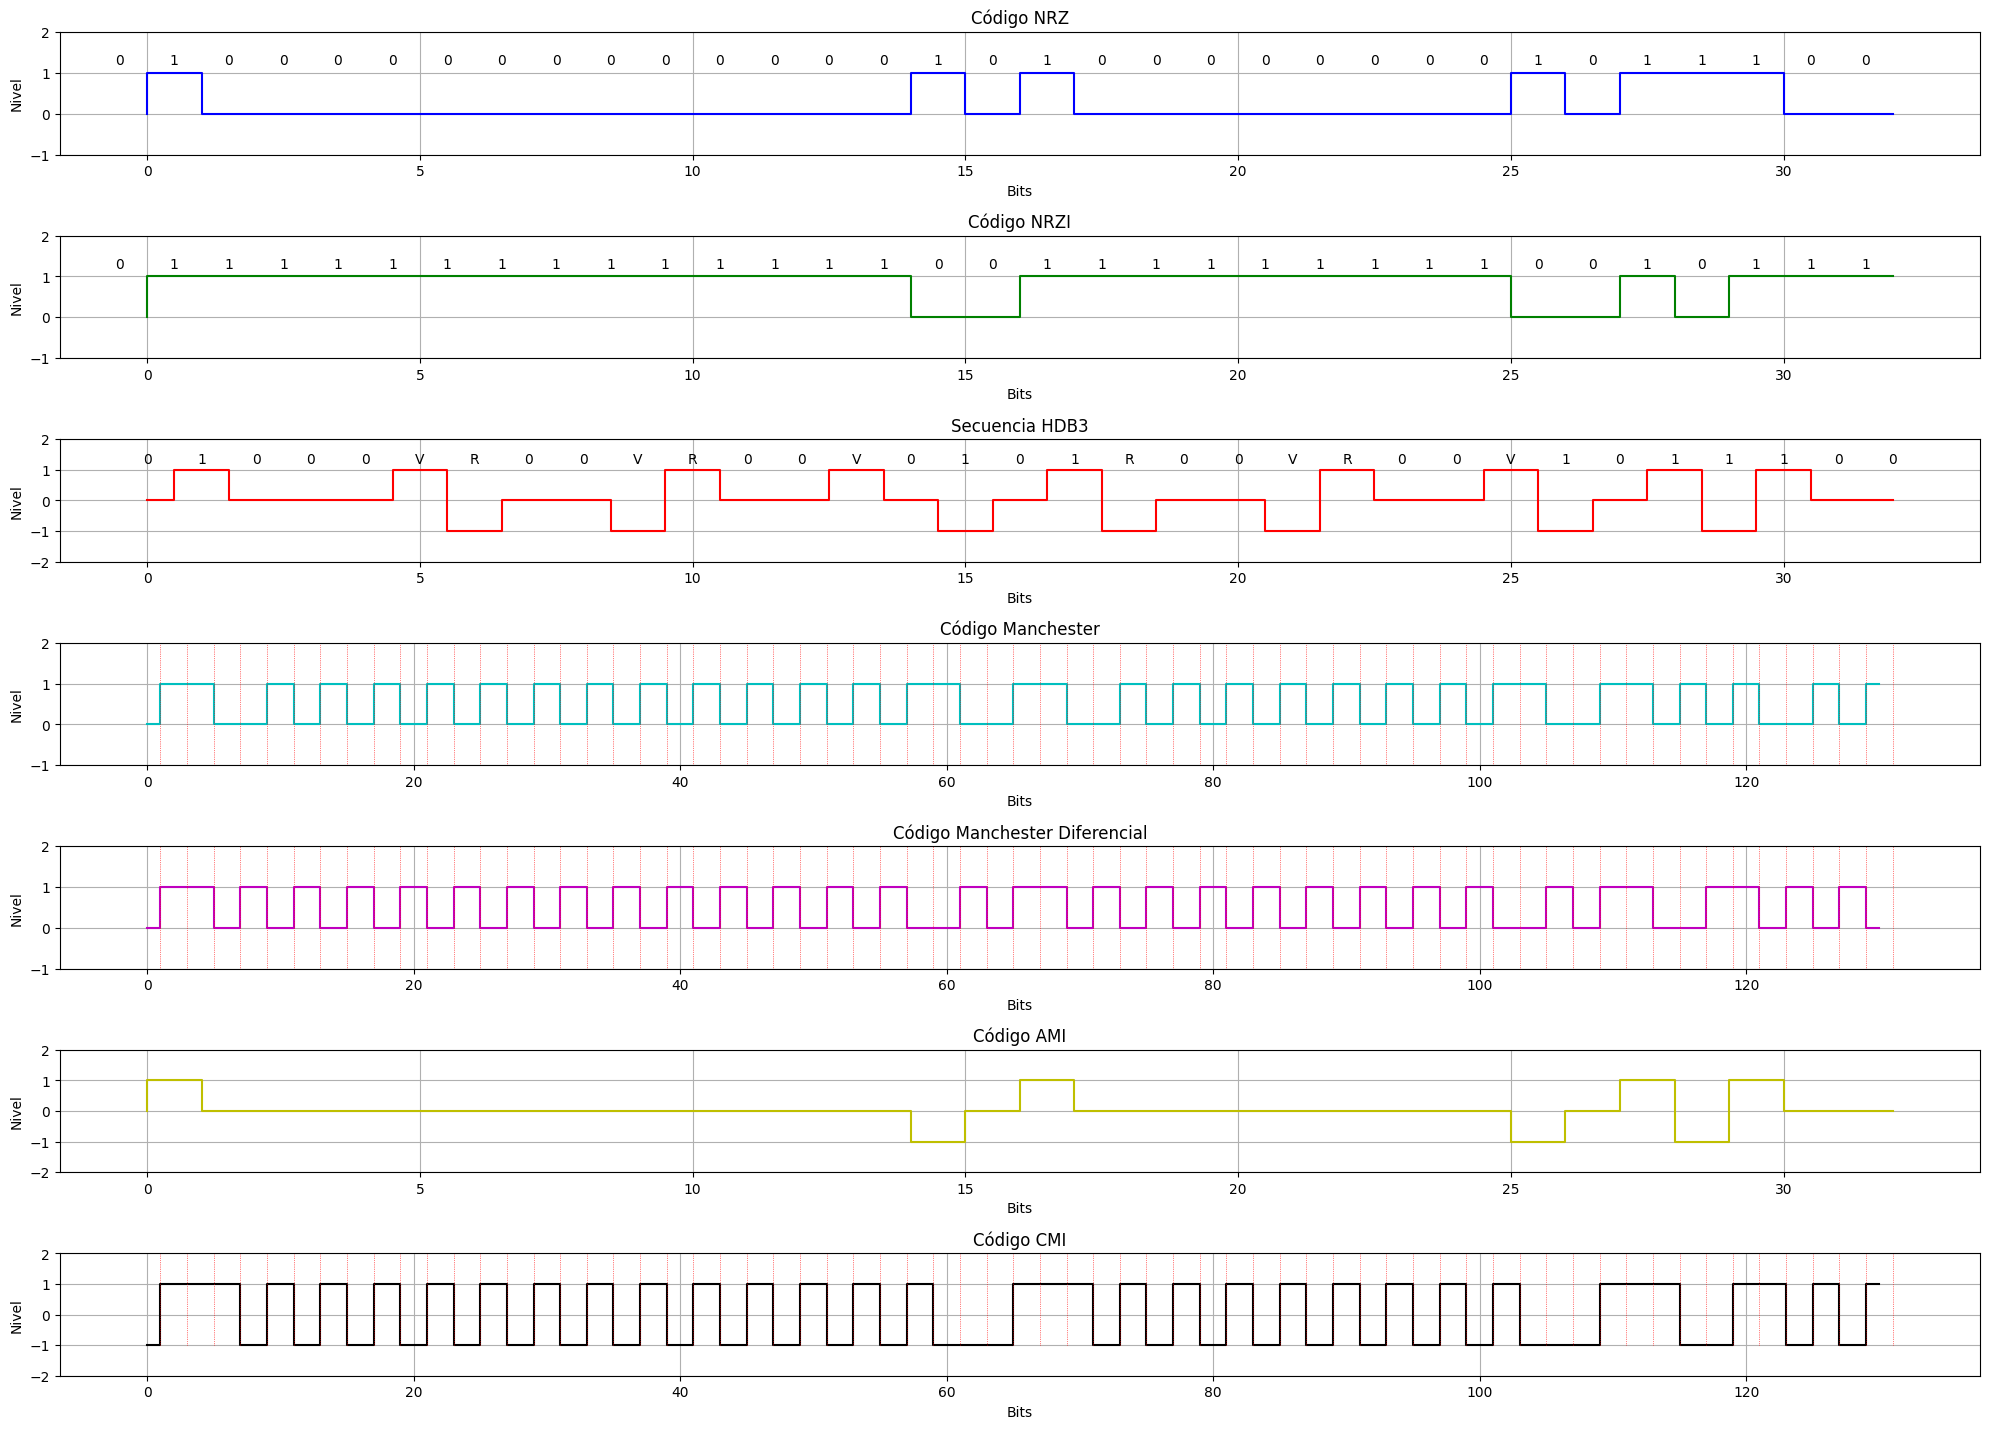

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

subplotIndex=8;
# binary_sequence = "101000000000000101010000010101011"
binary_sequence = "010000000000000101000000001011100"

# Código NRZ
nrz_sequence = binary_sequence

# Código NRZI
nrzi_sequence = []
nrzi_prev_bit = 0

for bit in binary_sequence:
    if bit == '1':
      if nrzi_prev_bit == 0:
        nrzi_prev_bit = 1
      else:
        nrzi_prev_bit = 0
    nrzi_sequence.append(nrzi_prev_bit)

# Código HDB3
hdb3_sequence = []
violation_sequence = []
polarity = 0
polarityRelleno = 0
zero_count = 0
one_count = 0
db=3
bits=[]
for bit in binary_sequence:
    if bit == '1':
      one_count += 1
      zero_count = 0
      if polarity == 1:
        polarity = -1
      else:
        polarity = 1

      hdb3_sequence.append(polarity)
      # print(polarity)
      violation_sequence.append(1)

    else:
      zero_count += 1

      if zero_count > 3:
        if polarity == 1:
          polarity = -1
        else:
          polarity = 1
        hdb3_sequence.append(polarity)
        violation_sequence.append('V')
        if one_count % 2 == 0:
          violation_sequence[len(violation_sequence)-4] = 'R'
          hdb3_sequence[len(hdb3_sequence)-4]=polarity
        else:
          if polarity == 1:
            polarity = -1
          else:
            polarity = 1
          hdb3_sequence[len(hdb3_sequence)-1]=polarity


        zero_count = 0
        one_count = 0
      else:
        hdb3_sequence.append(0)
        violation_sequence.append(0)

for bit in binary_sequence:
    # print(bit)
    if bit == '1':
      bits.append(1)
    else:
      bits.append(0)



# Código Manchester
manchester_sequence = []
for bit in binary_sequence:
    if bit == "0":
        manchester_sequence.append(0)
        manchester_sequence.append(1)
    else:
        manchester_sequence.append(1)
        manchester_sequence.append(0)

# Código Manchester Diferencial
manchester_differential_sequence = []
polarity = False

for bit in binary_sequence:
    if bit == "1":
      if polarity:
        polarity = False
      else:
        polarity = True
    if polarity:
        manchester_differential_sequence.append(1)
        manchester_differential_sequence.append(0)
    else:
        manchester_differential_sequence.append(0)
        manchester_differential_sequence.append(1)


# Código AMI
ami_sequence = ""
bipolar_prev_voltage = "-"
for bit in binary_sequence:
    if bit == "1":
        ami_sequence += "-" if bipolar_prev_voltage == "+" else "+"
        bipolar_prev_voltage = ami_sequence[-1]
    else:
        ami_sequence += "0"

ami_levels = []
for voltage in ami_sequence:
    if voltage == "+":
        ami_levels.append(1)
    elif voltage == "-":
        ami_levels.append(-1)
    else:
        ami_levels.append(0)



# Código CMI
cmi_sequence = []
cmi_polarity = 0

for bit in binary_sequence:
    if bit == "1":
      if cmi_polarity == 1:
        cmi_sequence.append(-1)
        cmi_sequence.append(-1)
        cmi_polarity = 0
      else:
        cmi_sequence.append(1)
        cmi_sequence.append(1)
        cmi_polarity = 1

    else:
        cmi_sequence.append(-1)
        cmi_sequence.append(1)


# Señal PSK
psk_signal = []
phase = 0
for bit in binary_sequence:
    if bit == "1":
        phase += np.pi  # Cambio de fase de 180 grados (pi radianes) para representar un bit '1'
    psk_signal.append(np.cos(phase))
# Crear un arreglo de tiempo
t = np.arange(0, len(psk_signal), 1)


# Configurar el tamaño del gráfico
plt.figure(figsize=(20, subplotIndex*2))

# Subplot para el Código NRZ
plt.subplot(subplotIndex, 1, 1)
plt.plot(range(len(nrz_sequence)), [int(bit) for bit in nrz_sequence], drawstyle='steps-pre', color='b')
plt.title("Código NRZ")
plt.xlabel("Bits")
plt.ylabel("Nivel")
plt.grid(True)
plt.ylim([-1, 2])


# Agregar los valores de binary_sequence en el gráfico
for i, bit in enumerate(binary_sequence):
    plt.text(i - 0.5, 1.2, bit, fontsize=10, horizontalalignment='center')


# Subplot para el Código NRZI
plt.subplot(subplotIndex, 1, 2)
plt.plot(range(len(nrzi_sequence)), [int(bit) for bit in nrzi_sequence], drawstyle='steps-pre', color='g')
plt.title("Código NRZI")
plt.xlabel("Bits")
plt.ylabel("Nivel")
plt.grid(True)
plt.ylim([-1, 2])

# Agregar los valores de nrzi_sequence en el gráfico
for i, bit in enumerate(nrzi_sequence):
    plt.text(i - 0.5, 1.2, bit, fontsize=10, horizontalalignment='center')


# Subplot para el Código HDB3
plt.subplot(subplotIndex, 1, 3)
valores_polaridad = [1 if polaridad == 1 else -1 if polaridad == -1 else 0 for polaridad in hdb3_sequence]
plt.plot(range(len(valores_polaridad)), valores_polaridad, drawstyle='steps-mid', color='r')
plt.title("Secuencia HDB3")
plt.xlabel("Bits")
plt.ylabel("Nivel")
plt.grid(True)
plt.ylim([-2, 2])

# Agregar los valores de violation_sequence en el gráfico
for i, bit in enumerate(violation_sequence):
    plt.text(i , 1.2, bit, fontsize=10, horizontalalignment='center')


# Subplot para el Código Manchester
plt.subplot(subplotIndex, 1, 4)
plt.plot(range(0, len(manchester_sequence) * 2, 2), [int(bit) for bit in manchester_sequence], drawstyle='steps-mid', color='c')
plt.title("Código Manchester")
plt.xlabel("Bits")
plt.ylabel("Nivel")
plt.grid(True)
plt.ylim([-1, 2])

# Agregar líneas punteadas verticales en cada valor
for x in range(0, len(manchester_sequence) * 2, 2):
    plt.vlines(x +1, -1, 2, colors='r', linestyles='dotted', lw=0.5)



# Subplot para el Código Manchester Diferencial
plt.subplot(subplotIndex, 1, 5)
plt.plot(range(0, len(manchester_differential_sequence) * 2, 2), [int(bit) for bit in manchester_differential_sequence], drawstyle='steps-mid', color='m')
plt.title("Código Manchester Diferencial")
plt.xlabel("Bits")
plt.ylabel("Nivel")
plt.grid(True)
plt.ylim([-1, 2])

# Agregar líneas punteadas verticales en cada valor
for x in range(0, len(manchester_differential_sequence) * 2, 2):
    plt.vlines(x +1, -1, 2, colors='r', linestyles='dotted', lw=0.5)


# Subplot para el Código AMI
plt.subplot(subplotIndex, 1, 6)
plt.plot(range(len(ami_levels)), ami_levels, drawstyle='steps-pre', color='y')
plt.title("Código AMI")
plt.xlabel("Bits")
plt.ylabel("Nivel")
plt.grid(True)
plt.ylim([-2, 2])


# Subplot para el Código CMI
plt.subplot(subplotIndex, 1, 7)
plt.plot(range(0,len(cmi_sequence)*2,2), [int(bit) for bit in cmi_sequence], drawstyle='steps-mid', color='k')
plt.title("Código CMI")
plt.xlabel("Bits")
plt.ylabel("Nivel")
plt.grid(True)
plt.ylim([-2, 2])
# Agregar líneas punteadas verticales en cada valor
for x in range(0, len(cmi_sequence) * 2, 2):
    plt.vlines(x +1, -1, 2, colors='r', linestyles='dotted', lw=0.5)

# Subplot para la señal PSK
# plt.subplot(subplotIndex, 1, 8)
# plt.plot(t, psk_signal)
# plt.title("Señal PSK")
# plt.xlabel("Muestras")
# plt.ylabel("Amplitud")
# plt.grid(True)
# plt.ylim([-2, 2])


plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Imprime las secuencias
# print("Secuencia binaria original:    ", binary_sequence)
# print("Código NRZ:                    ", nrz_sequence)
# print("Código NRZI:                   ", nrzi_sequence)
# print("Código HDB3:                   ", hdb3_sequence)
# print("Código Manchester:             ", manchester_sequence)
# print("Código Manchester Diferencial: ", manchester_differential_sequence)
# print("Código AMI:                    ", ami_levels)
# print("Código CMI:                    ", cmi_sequence)



#	IQC	IC	QC	Cos		Sen		Rec			Pol
0	000	00	00	-0.541 cos(0)	-0.541 sin(90)	(-0.541-0.541j)		0.765 -135.000°
1	001	01	01	-1.307 cos(0)	-1.307 sin(90)	(-1.307-1.307j)		1.848 -135.000°
2	010	00	10	-0.541 cos(0)	-0.541 sin(90)	(-0.541+0.541j)		0.765 135.000°
3	011	01	11	-1.307 cos(0)	-1.307 sin(90)	(-1.307+1.307j)		1.848 135.000°
4	100	10	00	0.541 cos(0)	0.541 sin(90)	(0.541-0.541j)		0.765 -45.000°
5	101	11	01	1.307 cos(0)	1.307 sin(90)	(1.307-1.307j)		1.848 -45.000°
6	110	10	10	0.541 cos(0)	0.541 sin(90)	(0.541+0.541j)		0.765 45.000°
7	111	11	11	1.307 cos(0)	1.307 sin(90)	(1.307+1.307j)		1.848 45.000°


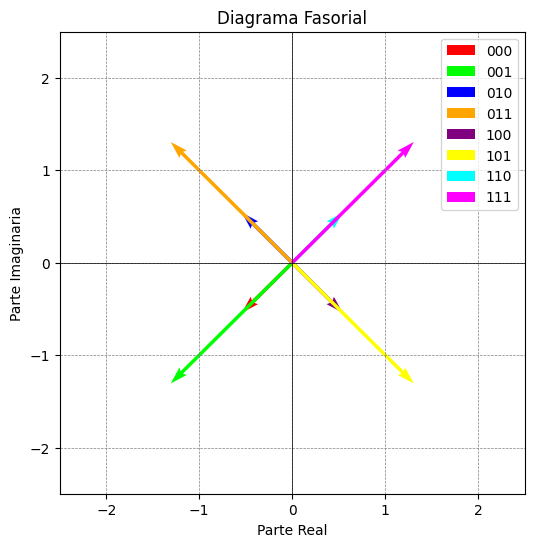

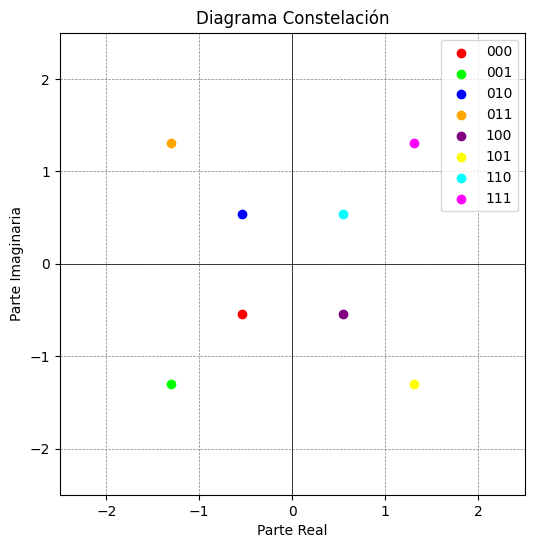

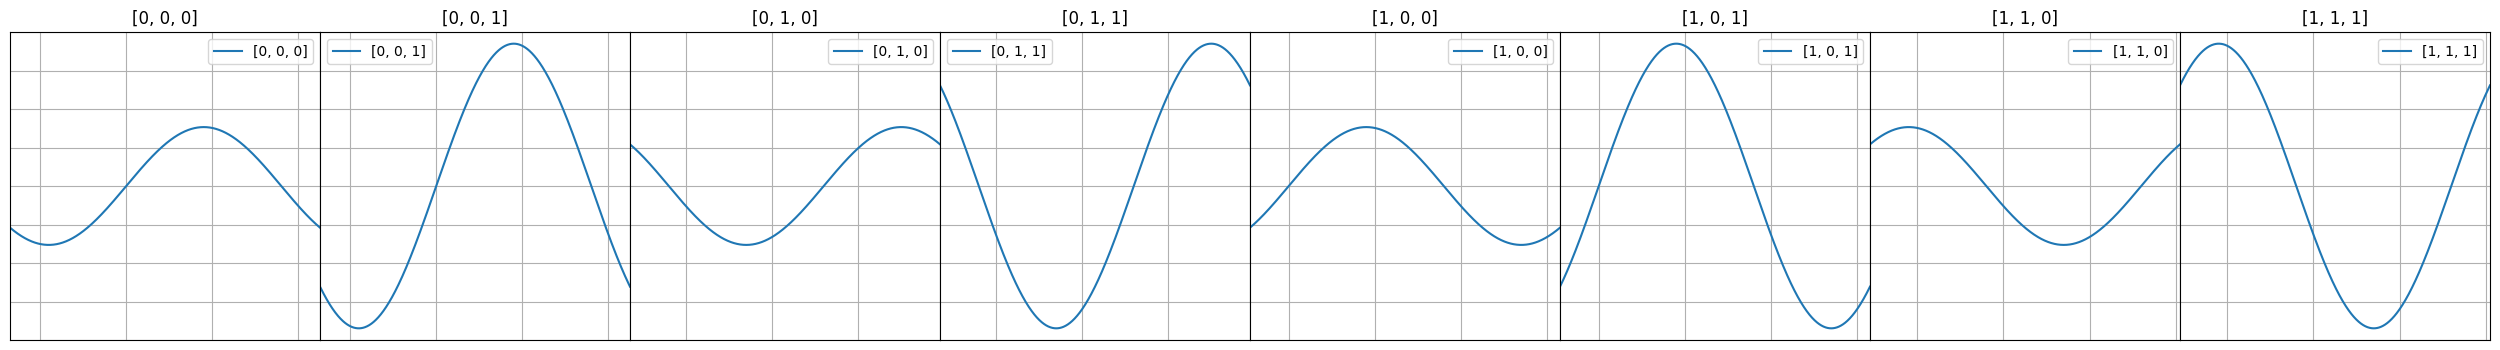

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import math

colores = ['#FF0000', '#00FF00', '#0000FF', '#FFA500', '#800080', '#FFFF00', '#00FFFF', '#FF00FF']

numero_rectangular=0

c0=0.541;
c1=1.307;


matriz = [
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1],
]

fasorData=[]

print("{}\t{}{}{}\t{}{}\t{}{}\t{}\t\t{}\t\t{}\t\t\t{}".format("#","I","Q","C","I","C","Q","C","Cos","Sen","Rec","Pol"))
# Imprimir la matriz
for i, fila in enumerate(matriz):
    real = 0
    img= 0
    c=0
    if(fila[2]==1):
      c=c1
    else:
      c=c0

    if(fila[0]==0):
      real = c * -1
    else:
      real = c

    if(fila[1]==0):
      img = c * -1
    else:
      img = c

    numero_complejo = complex(real, img)
    magnitud = np.abs(numero_complejo)
    fase_rad = np.angle(numero_complejo)
    fase_grados = np.angle(numero_complejo, deg=True)

    fasorData.append((real,img,fila,fase_grados,magnitud))
    print("{}\t{}{}{}\t{}{}\t{}{}\t{}\t{}\t{}\t\t{}".format(i,fila[0],fila[1],fila[2],fila[0],fila[2],fila[1],fila[2],str(real)+" "+"cos(0)",str(real)+" "+"sin(90)",numero_complejo, "{:.3f} {:.3f}\u00B0".format(magnitud, fase_grados) ))


# print(fasorData)


plt.figure(figsize=(6, 6))

for i, fasor  in enumerate(fasorData):
  plt.quiver(0, 0, fasor[0], fasor[1], angles='xy', scale_units='xy', scale=1, color=colores[i], label=str(matriz[i][0])+str(matriz[i][1])+str(matriz[i][2]),headlength=5, linewidth=0.1)

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

# Configurar etiquetas
plt.title('Diagrama Fasorial')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

# Mostrar el gráfico
plt.show()



plt.figure(figsize=(6, 6))

# Mostrar puntos en lugar de vectores
for i, fasor in enumerate(fasorData):
    plt.scatter(fasor[0], fasor[1], color=colores[i], label=str(matriz[i][0])+str(matriz[i][1])+str(matriz[i][2]))

# Configurar límites de los ejes
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

# Configurar etiquetas
plt.title('Diagrama Constelación')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Agregar leyenda
plt.legend()

plt.show()





fig, axs = plt.subplots(1, len(fasorData), figsize=(4 * len(fasorData), 4), sharey=True)

for i, fasor in enumerate(fasorData):
    start_angle_rad = np.radians(fasor[3])
    end_angle_rad = np.radians(360 + fasor[3])
    amplitude = fasor[4]

    angles = np.linspace(start_angle_rad, end_angle_rad, 1000)
    sine_values = amplitude * np.sin(angles)

    # Utilizar axs[i] para acceder al subgráfico correspondiente
    axs[i].plot(np.degrees(angles), sine_values, label=fasor[2])

    # Configuración del subgráfico
    axs[i].set_title(fasor[2])
    axs[i].set_ylim(-2, 2)
    axs[i].set_xlim(fasor[3], 360 + fasor[3])

    # Quitar los números de los ejes y el espaciado entre subgráficos
    axs[i].tick_params(left=False, labelleft=False)
    axs[i].tick_params(bottom=False, labelbottom=False)

    axs[i].legend()
    axs[i].grid(True)

# Ajustar el espaciado entre subgráficos
plt.subplots_adjust(wspace=0)

# Mostrar los subgráficos
plt.show()